# Multiple Linear Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# This is just generating data
n = 200
x1 = np.random.sample(n)*20
x2 = np.random.sample(n)*20 #-3*x1 
x3 = np.random.sample(n)*20

X = (x1,x2,x3)
a = np.random.sample(n)*20 + 50

B = (3.5,-1.5,.005)
b1,b2,b3 = B
y = b1*x1 + b2*x2 + b3*x3 + a

# We don't add the random error to our dataset because in real life it is unknown
df = pd.DataFrame({'feature1':x1,'feature2':x2,'feature3':x3})

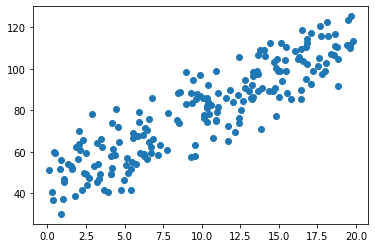

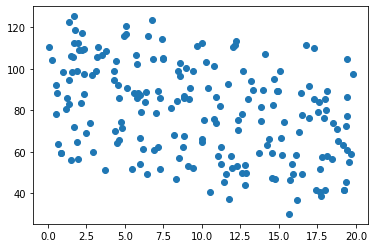

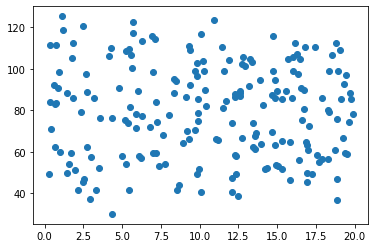

(200, 4)


,feature1,feature2,feature3,target
0,7.327287,19.128679,14.858057,63.323026
1,15.757308,17.246217,15.287607,85.223784
2,15.000042,10.911146,12.312203,86.479873
3,12.419391,3.185908,16.048413,105.718319
4,0.471826,0.886965,6.966008,59.492882


In [5]:
# Having a look at the data

df['target'] = y

# fig, ax = plt.subplots()
for x in X:
    plt.figure()
    plt.scatter(x,y)
    plt.show()

print(df.shape)
df.head()

In [4]:
# Pre-processing
X = df.drop('target',axis=1)
y = df['target']

### Regression in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [5]:
from sklearn.linear_model import LinearRegression

# Setting up the LEARNER
model_skl = LinearRegression(fit_intercept=True,
                             normalize=False,
                             n_jobs=-1
                            )

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_B = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: real {} vs {} estimated'.format(B,est_B.round(4)))

R2 = 0.94
constant: 59.9863
coeficients: real (3.5, -1.5, 0.005) vs [ 3.4715 -1.5012  0.0173] estimated


### Regression in [Statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) and its [Interpretation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

In [6]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

ValueError: endog and exog matrices are different sizes

### Statsmodels superpower

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          7.62e-121
Time:                        09:25:33   Log-Likelihood:                -631.33
No. Observations:                 200   AIC:                             1271.
Df Residuals:                     196   BIC:                             1284.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9863      1.304     46.016      0.000      57.415      62.557
feature1       3.4715      0.068     51.037      0.000       3.337       3.606
feature2      -1.5012      0.070    -21.390      0.000      -1.640      -1.363
feature3       0.0173      0.071      0.242      0.809      -0.124       0.158
==============================================================================
Omnibus:                       61.823   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.652
Skew:                           0.059   Prob(JB):                      0.00486
Kurtosis:                       1.876   Cond. No.                         58.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicolinearity exploration

In [8]:
X.corr()

,const,feature1,feature2,feature3
const,NaN,NaN,NaN,NaN
feature1,NaN,1.000000,-0.050013,-0.024905
feature2,NaN,-0.050013,1.000000,-0.017347
feature3,NaN,-0.024905,-0.017347,1.000000


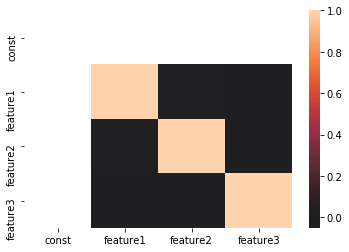

In [9]:
import seaborn as sns
sns.heatmap(X.corr(), center=0)